# Exploratory Data Analysis (EDA) on Viewership Data

This analysis aims to explore and visualize the viewership data to gain insights into user behavior, preferences, and patterns. The steps include loading the data, visualizing each column, and drawing insights from the visualizations.

### Step 1: Load and Inspect the Data

We start by loading the data and displaying the first few rows along with summary statistics to understand the structure and content of the dataset.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
import statsmodels.api as sm

In [4]:
data = pd.read_csv('../data/Viewership data.csv')
data.head()

,User_ID,Session_ID,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,eb4f9229-74df-45f6-baac-cf19241b8b30,cb2142a7-0750-49ed-b8ac-a975fe1ff69a,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,661d4b59-4328-410a-901c-1e3b4c40c334,3bc0a662-b353-4015-8b0c-55ceb510d13a,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,dd3fe9e9-ea82-4891-ab93-8a47c80e3251,bd545b4a-9f54-4e87-b9f8-15ae20b44f22,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,a1b3365b-1d00-4ddf-bc43-02fc9c10c680,0441086d-c59e-478d-a496-5c5b995ecfdb,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,338d3f91-5f1c-4590-8803-324901826406,0295f01d-7f15-4799-856c-90c688697ef8,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [21]:
columns_to_drop = ['User_ID', 'Session_ID']
data = data.drop(columns_to_drop, axis=1)

In [22]:
data.head()

,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,232,11,90.044525,Sci-Fi,Sudan,56,Female,Premium,3,Spanish,Smartphone,Reedshire,4K,73
1,549,85,68.973479,Comedy,Cuba,52,Male,Premium,3,Chinese,Desktop,Stevenhaven,SD,22
2,844,50,42.511343,Comedy,Japan,14,Female,Premium,3,Spanish,Tablet,Vaughntown,HD,41
3,201,38,53.316660,Documentary,Lao People's Democratic Republic,36,Male,Premium,2,Spanish,Laptop,East Raymondbury,SD,40
4,700,31,69.437786,Action,Bangladesh,31,Male,Premium,4,German,Laptop,Michaelchester,HD,41


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device_ID                   6214 non-null   int64  
 1   Video_ID                    6214 non-null   int64  
 2   Duration_Watched (minutes)  6214 non-null   float64
 3   Genre                       6214 non-null   object 
 4   Country                     6214 non-null   object 
 5   Age                         6214 non-null   int64  
 6   Gender                      6214 non-null   object 
 7   Subscription_Status         6214 non-null   object 
 8   Ratings                     6214 non-null   int64  
 9   Languages                   6214 non-null   object 
 10  Device_Type                 6214 non-null   object 
 11  Location                    6214 non-null   object 
 12  Playback_Quality            6214 non-null   object 
 13  Interaction_Events          6214 


### Step 2: Describing Data

In [6]:
# Display summary statistics
print("\nSummary statistics for each column:")
print(data.describe())


Summary statistics for each column:
         Device_ID     Video_ID  Duration_Watched (minutes)          Age  \
count  6214.000000  6214.000000                 6214.000000  6214.000000   
mean    496.762150    50.323785                   60.378389    39.665594   
std     287.681163    28.671178                   34.597273    17.571317   
min       1.000000     1.000000                    0.055809    10.000000   
25%     248.000000    26.000000                   30.413538    24.000000   
50%     493.500000    50.000000                   60.765637    40.000000   
75%     742.000000    75.000000                   90.874141    55.000000   
max    1000.000000   100.000000                  119.999972    70.000000   

           Ratings  Interaction_Events  
count  6214.000000         6214.000000  
mean      2.987448           50.776794  
std       1.403304           29.009363  
min       1.000000            0.000000  
25%       2.000000           26.000000  
50%       3.000000           51.


### Step 3: Visualizing data

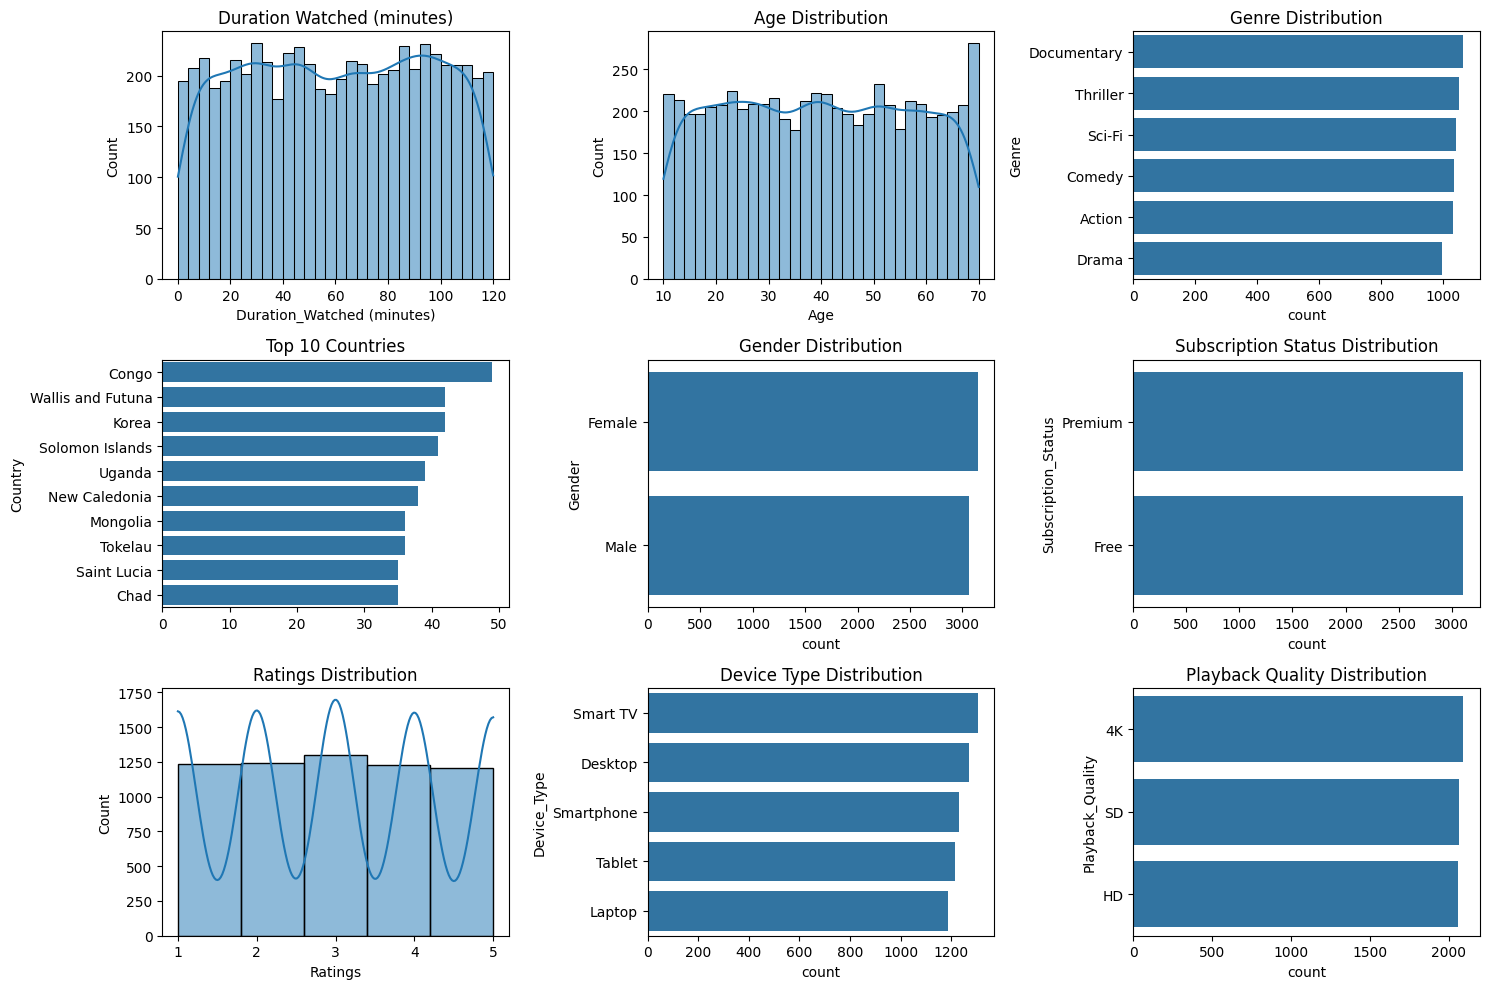

In [12]:
# Set up the matplotlib figure for general visualizations
plt.figure(figsize=(15, 10))

# Plot 1: Histogram of Duration Watched
plt.subplot(3, 3, 1)
sns.histplot(data['Duration_Watched (minutes)'], bins=30, kde=True)
plt.title('Duration Watched (minutes)')

# Plot 2: Histogram of Age
plt.subplot(3, 3, 2)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')

# Plot 3: Bar plot of Genre
plt.subplot(3, 3, 3)
sns.countplot(y=data['Genre'], order=data['Genre'].value_counts().index)
plt.title('Genre Distribution')

# Plot 4: Bar plot of Country (Top 10)
plt.subplot(3, 3, 4)
top_countries = data['Country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries')

# Plot 5: Bar plot of Gender
plt.subplot(3, 3, 5)
sns.countplot(data['Gender'])
plt.title('Gender Distribution')

# Plot 6: Bar plot of Subscription Status
plt.subplot(3, 3, 6)
sns.countplot(data['Subscription_Status'])
plt.title('Subscription Status Distribution')

# Plot 7: Histogram of Ratings
plt.subplot(3, 3, 7)
sns.histplot(data['Ratings'], bins=5, kde=True)
plt.title('Ratings Distribution')

# Plot 8: Bar plot of Device Type
plt.subplot(3, 3, 8)
sns.countplot(y=data['Device_Type'], order=data['Device_Type'].value_counts().index)
plt.title('Device Type Distribution')

# Plot 9: Bar plot of Playback Quality
plt.subplot(3, 3, 9)
sns.countplot(data['Playback_Quality'])
plt.title('Playback Quality Distribution')

plt.tight_layout()
plt.show()


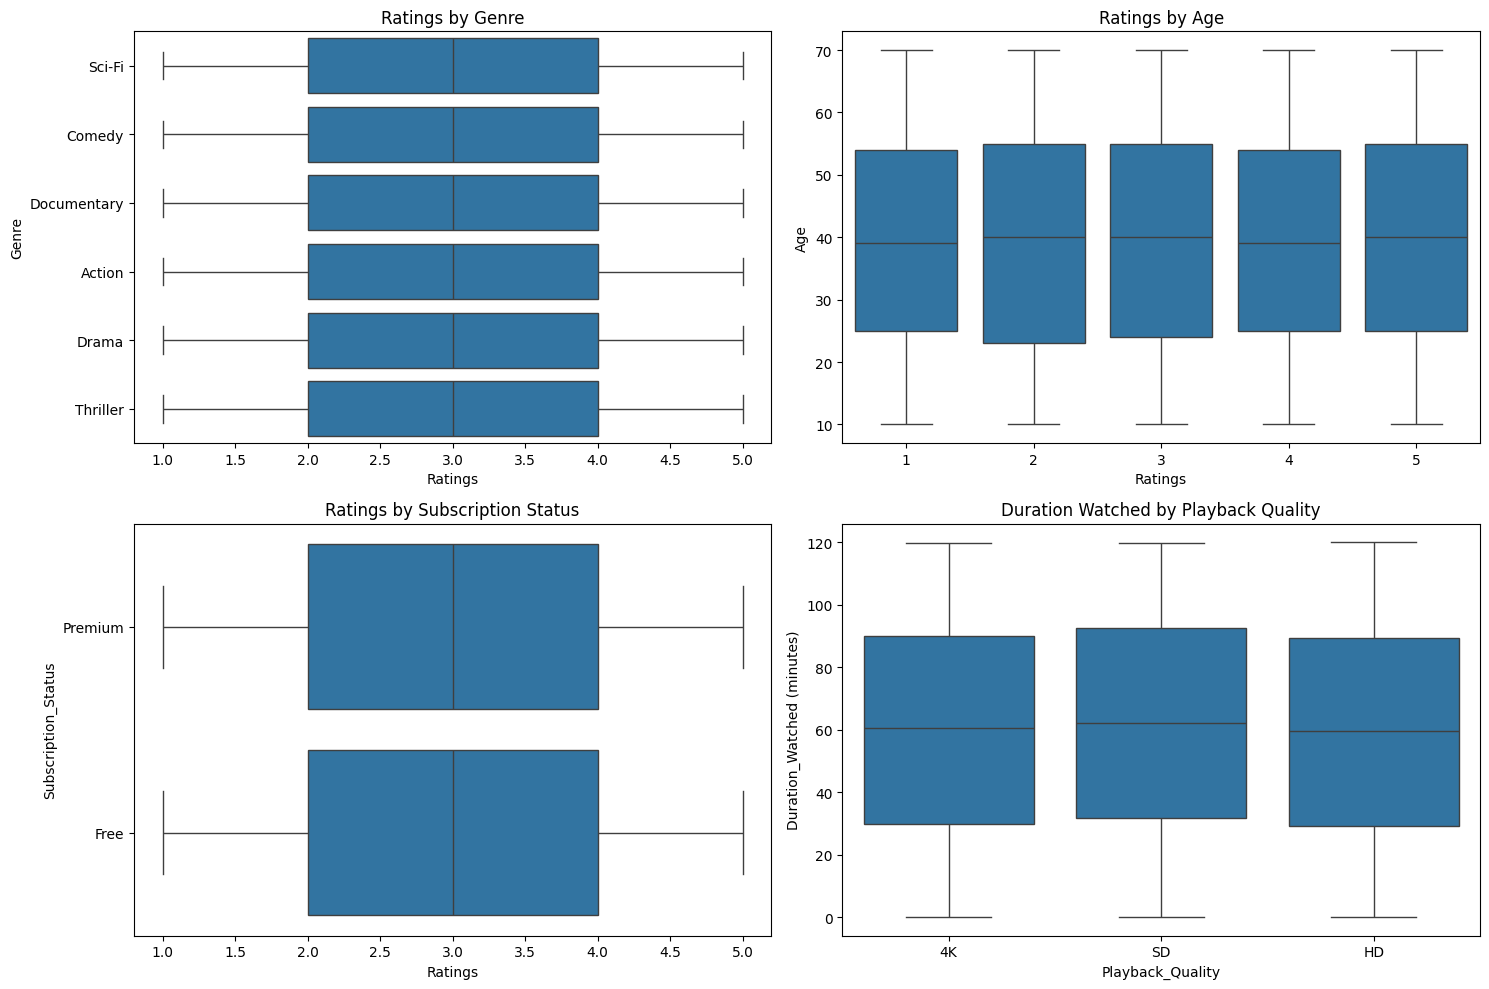

In [11]:
# Set up the matplotlib figure for detailed analysis
plt.figure(figsize=(15, 10))

# Plot 1: Box plot of Ratings by Genre
plt.subplot(2, 2, 1)
sns.boxplot(x='Ratings', y='Genre', data=data)
plt.title('Ratings by Genre')

# Plot 2: Box plot of Ratings by Age
plt.subplot(2, 2, 2)
sns.boxplot(x='Ratings', y='Age', data=data)
plt.title('Ratings by Age')

# Plot 3: Box plot of Ratings by Subscription Status
plt.subplot(2, 2, 3)
sns.boxplot(x='Ratings', y='Subscription_Status', data=data)
plt.title('Ratings by Subscription Status')

# Plot 4: Box plot of Duration Watched by Playback Quality
plt.subplot(2, 2, 4)
sns.boxplot(x='Playback_Quality', y='Duration_Watched (minutes)', data=data)
plt.title('Duration Watched by Playback Quality')

plt.tight_layout()
plt.show()

In [15]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
                                User_ID                            Session_ID  \
0  eb4f9229-74df-45f6-baac-cf19241b8b30  cb2142a7-0750-49ed-b8ac-a975fe1ff69a   
1  661d4b59-4328-410a-901c-1e3b4c40c334  3bc0a662-b353-4015-8b0c-55ceb510d13a   
2  dd3fe9e9-ea82-4891-ab93-8a47c80e3251  bd545b4a-9f54-4e87-b9f8-15ae20b44f22   
3  a1b3365b-1d00-4ddf-bc43-02fc9c10c680  0441086d-c59e-478d-a496-5c5b995ecfdb   
4  338d3f91-5f1c-4590-8803-324901826406  0295f01d-7f15-4799-856c-90c688697ef8   

   Device_ID  Video_ID  Duration_Watched (minutes)        Genre  \
0        232        11                   90.044525       Sci-Fi   
1        549        85                   68.973479       Comedy   
2        844        50                   42.511343       Comedy   
3        201        38                   53.316660  Documentary   
4        700        31                   69.437786       Action   

                            Country  Age  Gender Subscription_Status  Ratings  

### Step 4: Feature engineering

In [24]:
from sklearn.preprocessing import LabelEncoder

# Get the list of columns with data type 'object'
object_cols = data.select_dtypes(include=['object']).columns

# Create an instance of LabelEncoder
le = LabelEncoder()

# Loop through the object columns and perform label encoding
for col in object_cols:
    data[col] = le.fit_transform(data[col])
data.head()

,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,232,11,90.044525,4,205,56,0,1,3,4,3,3855,0,73
1,549,85,68.973479,1,54,52,1,1,3,0,0,4503,2,22
2,844,50,42.511343,1,108,14,0,1,3,4,4,4656,1,41
3,201,38,53.316660,2,117,36,1,1,2,4,1,950,2,40
4,700,31,69.437786,0,17,31,1,1,4,3,1,2378,1,41


In [25]:
# Display summary statistics
print("\nSummary statistics for each column:")
print(data.describe())


Summary statistics for each column:
         Device_ID     Video_ID  Duration_Watched (minutes)        Genre  \
count  6214.000000  6214.000000                 6214.000000  6214.000000   
mean    496.762150    50.323785                   60.378389     2.504345   
std     287.681163    28.671178                   34.597273     1.710656   
min       1.000000     1.000000                    0.055809     0.000000   
25%     248.000000    26.000000                   30.413538     1.000000   
50%     493.500000    50.000000                   60.765637     2.000000   
75%     742.000000    75.000000                   90.874141     4.000000   
max    1000.000000   100.000000                  119.999972     5.000000   

           Country          Age       Gender  Subscription_Status  \
count  6214.000000  6214.000000  6214.000000          6214.000000   
mean    122.457515    39.665594     0.493402             0.499356   
std      70.580012    17.571317     0.499997             0.500040   
mi

In [26]:
## Hypothesis Testing

# T-test: Compare means of Duration_Watched between male and female viewers
male_viewers = data[data['Gender'] == 'Male']['Duration_Watched (minutes)']
female_viewers = data[data['Gender'] == 'Female']['Duration_Watched (minutes)']

t_stat, p_value = stats.ttest_ind(male_viewers, female_viewers)
print(f"T-test: Compare Duration Watched between Male and Female viewers\nT-statistic: {t_stat}, P-value: {p_value}")

T-test: Compare Duration Watched between Male and Female viewers
T-statistic: nan, P-value: nan


/var/folders/3y/yqvphm7j1mg6crkhdzg5mff80000gn/T/ipykernel_33265/2290408705.py:7: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = stats.ttest_ind(male_viewers, female_viewers)


In [27]:

# Chi-Square Test: Compare subscription status with playback quality
contingency_table = pd.crosstab(data['Subscription_Status'], data['Playback_Quality'])
chi2, chi2_p_value, dof, ex = stats.chi2_contingency(contingency_table)
print(f"\nChi-Square Test: Compare Subscription Status with Playback Quality\nChi-square statistic: {chi2}, P-value: {chi2_p_value}")


Chi-Square Test: Compare Subscription Status with Playback Quality
Chi-square statistic: 1.851842385255235, P-value: 0.3961663054509311


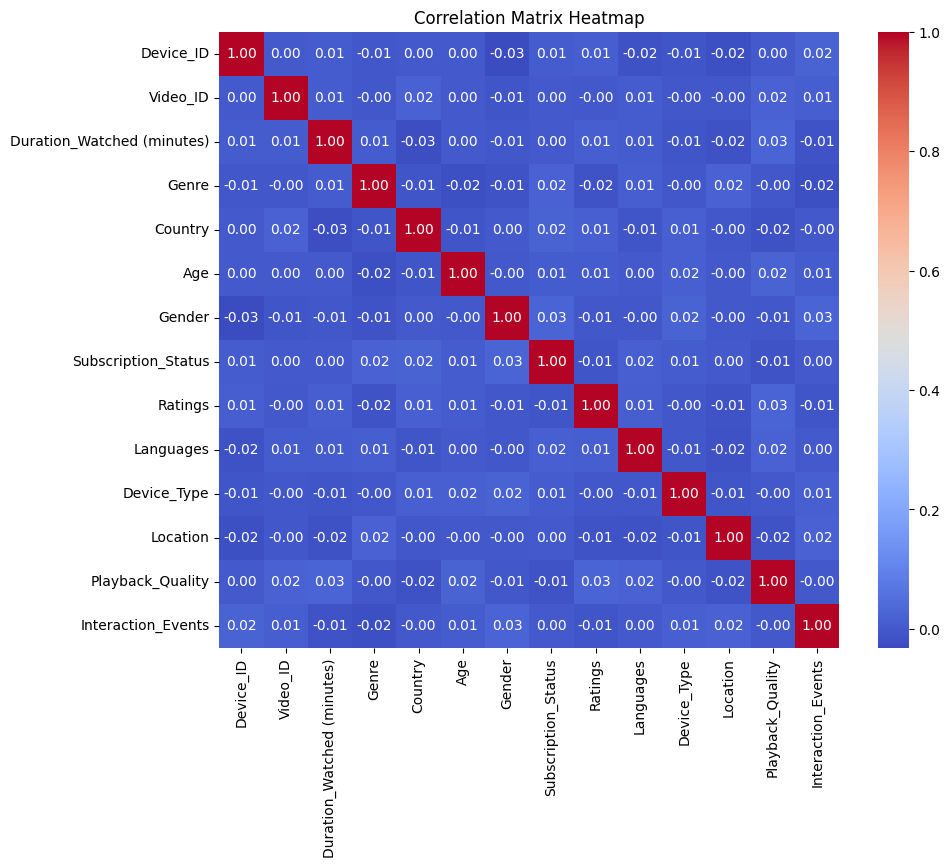

In [28]:
## Correlation Analysis

# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
# Specific correlation: Duration Watched vs Ratings
corr_duration_ratings = data['Duration_Watched (minutes)'].corr(data['Ratings'])
print(f"Correlation between Duration Watched and Ratings: {corr_duration_ratings}")

Correlation between Duration Watched and Ratings: 0.010902303750305594


In [30]:
## Descriptive Statistics by Group

# Mean duration watched by subscription status
mean_duration_by_subscription = data.groupby('Subscription_Status')['Duration_Watched (minutes)'].mean()
print(f"\nMean Duration Watched by Subscription Status:\n{mean_duration_by_subscription}")


Mean Duration Watched by Subscription Status:
Subscription_Status
0    60.263430
1    60.493643
Name: Duration_Watched (minutes), dtype: float64


In [31]:
# Mean ratings by genre
mean_ratings_by_genre = data.groupby('Genre')['Ratings'].mean()
print(f"\nMean Ratings by Genre:\n{mean_ratings_by_genre}")


Mean Ratings by Genre:
Genre
0    3.041748
1    3.013553
2    2.928638
3    3.016080
4    2.962536
5    2.965714
Name: Ratings, dtype: float64


In [32]:
## ANOVA: Compare means of ratings across different genres
anova_genre = stats.f_oneway(*[data[data['Genre'] == genre]['Ratings'] for genre in data['Genre'].unique()])
print(f"\nANOVA: Compare means of Ratings across Genres\nF-statistic: {anova_genre.statistic}, P-value: {anova_genre.pvalue}")


ANOVA: Compare means of Ratings across Genres
F-statistic: 0.9528029092646811, P-value: 0.44544006880937015


In [35]:
data.head()

,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,232,11,90.044525,4,205,56,0,1,3,4,3,3855,0,73
1,549,85,68.973479,1,54,52,1,1,3,0,0,4503,2,22
2,844,50,42.511343,1,108,14,0,1,3,4,4,4656,1,41
3,201,38,53.316660,2,117,36,1,1,2,4,1,950,2,40
4,700,31,69.437786,0,17,31,1,1,4,3,1,2378,1,41


In [36]:
# Regression Analysis: Predict Duration Watched based on Ratings, Age, and Subscription Status

# Define the independent variables and dependent variable
X = data[['Ratings', 'Age', 'Subscription_Status']]
y = data['Duration_Watched (minutes)']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print("\nRegression Analysis: Predict Duration Watched\n")
print(model.summary())


Regression Analysis: Predict Duration Watched

                                OLS Regression Results                                
Dep. Variable:     Duration_Watched (minutes)   R-squared:                       0.000
Model:                                    OLS   Adj. R-squared:                 -0.000
Method:                         Least Squares   F-statistic:                    0.2714
Date:                        Sat, 29 Jun 2024   Prob (F-statistic):              0.846
Time:                                16:08:24   Log-Likelihood:                -30837.
No. Observations:                        6214   AIC:                         6.168e+04
Df Residuals:                            6210   BIC:                         6.171e+04
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0

In [39]:
data.to_csv('../data/clean_data.csv',index=False)

# Churn Prediction

In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [42]:
# Load the data
file_path = '../data/clean_data.csv'
data = pd.read_csv(file_path)

In [43]:
data.head()

,Device_ID,Video_ID,Duration_Watched (minutes),Genre,Country,Age,Gender,Subscription_Status,Ratings,Languages,Device_Type,Location,Playback_Quality,Interaction_Events
0,232,11,90.044525,4,205,56,0,1,3,4,3,3855,0,73
1,549,85,68.973479,1,54,52,1,1,3,0,0,4503,2,22
2,844,50,42.511343,1,108,14,0,1,3,4,4,4656,1,41
3,201,38,53.316660,2,117,36,1,1,2,4,1,950,2,40
4,700,31,69.437786,0,17,31,1,1,4,3,1,2378,1,41


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6214 entries, 0 to 6213
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Device_ID                   6214 non-null   int64  
 1   Video_ID                    6214 non-null   int64  
 2   Duration_Watched (minutes)  6214 non-null   float64
 3   Genre                       6214 non-null   int64  
 4   Country                     6214 non-null   int64  
 5   Age                         6214 non-null   int64  
 6   Gender                      6214 non-null   int64  
 7   Subscription_Status         6214 non-null   int64  
 8   Ratings                     6214 non-null   int64  
 9   Languages                   6214 non-null   int64  
 10  Device_Type                 6214 non-null   int64  
 11  Location                    6214 non-null   int64  
 12  Playback_Quality            6214 non-null   int64  
 13  Interaction_Events          6214 

In [57]:
# Handle missing values if any
data.fillna(method='ffill', inplace=True)

/var/folders/3y/yqvphm7j1mg6crkhdzg5mff80000gn/T/ipykernel_33265/3873954351.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [62]:
data = data.rename(columns={'Subscription_Status': 'Churn'})

In [63]:
# Encode categorical variables using one-hot encoding
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove('Churn')

In [64]:
# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [65]:
# Define the model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

In [66]:
# Split the data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [69]:
# Tune hyperparameters using Grid Search with cross-validation
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [70]:
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_res, y_train_res)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation AUC score: {grid_search.best_score_:.2f}")

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}
Best cross-validation AUC score: 0.51


In [48]:
# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [49]:
# Make predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

In [50]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [51]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.48
Precision: 0.48
Recall: 0.48
ROC-AUC Score: 0.48

Confusion Matrix:
[[295 324]
 [327 297]]

Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.48      0.48       619
           1       0.48      0.48      0.48       624

    accuracy                           0.48      1243
   macro avg       0.48      0.48      0.48      1243
weighted avg       0.48      0.48      0.48      1243



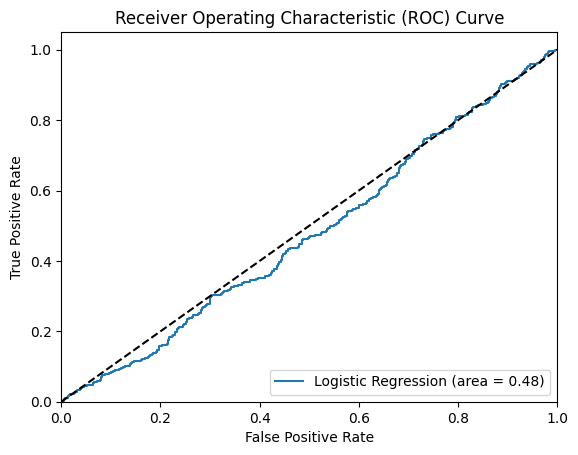

In [54]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [71]:
# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [72]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"ROC-AUC Score: {roc_auc:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.49
Precision: 0.49
Recall: 0.51
ROC-AUC Score: 0.48

Confusion Matrix:
[[293 326]
 [306 318]]

Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.47      0.48       619
           1       0.49      0.51      0.50       624

    accuracy                           0.49      1243
   macro avg       0.49      0.49      0.49      1243
weighted avg       0.49      0.49      0.49      1243



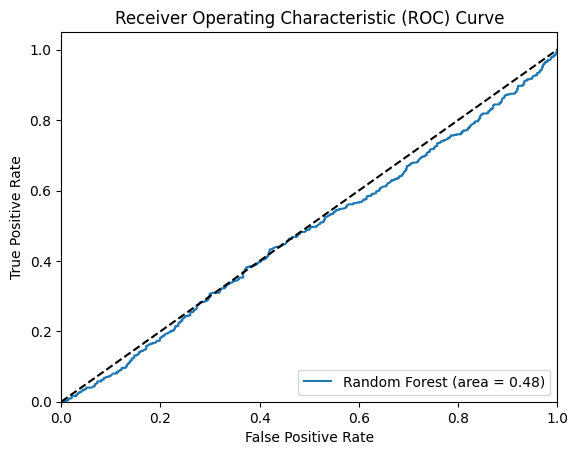

In [73]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()